In [1]:
import random

In [ ]:
sentence = """
句子 = 主 谓 宾
主 = 你 | 我 | 他
谓 = 吃 | 喝
宾 = 橘子 | 汽水 | 茶
"""

## input: 根据这个语法定语，能够生成句子

In [2]:
def sentence(): 
    return 主语() + 谓语() + 宾语()

def 主语(): 
    return random.choice('你 | 我 | 他'.split('|'))

def 谓语():
    return random.choice('吃 | 喝'.split('|'))

def 宾语():
    return random.choice('橘子 | 汽水 | 茶'.split('|'))

In [9]:
for _ in range(10):
    print(sentence())

 我 吃  汽水 
 我  喝橘子 
 他吃  汽水 
你  喝 汽水 
 我  喝 汽水 
你  喝橘子 
你  喝 茶
你  喝 汽水 
你 吃  汽水 
 我  喝橘子 


In [ ]:
two_number = """
numbers = num numbers | num
num = 0 | 1 | 2 | 3
"""

In [51]:
# def numbers_with_bug():
#     return random.choice([num() + numbers_with_bug(), num()])

def num():
    return random.choice(' 0 | 1 | 2 | 3'.split('|'))

def numbers():
    if random.random() < 0.3: 
        return num()
    else:
        return num() + numbers()

In [58]:
numbers()

' 2  1  0  0  1 '

In [79]:
for _ in range(10):
    print(numbers())

 0  1  2  2  1  0  1 
 0  0 
 3
 2  1  1  1  3 1  0 
 3
 1  0 
 1  3 2 
 1  1  0  1  1  1 
 1  0  1 
 1 


## 怎么样在问题场景变化（语法变化）的情况下，你的程序不需要重新写？

In [115]:
numbers_ops = """
expression => expression op num_op | num_op
num_op => nums op nums
nums => num nums | num
num => 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
op => + | - | * | /
""" # 3 + 4 / 6 * 9

In [155]:
def generate_grammer(grammer_str: str, split='=>'):
    grammar = {}

    for line in grammer_str.split('\n'):
        if not line: continue

        expr, formula = line.split(split)
        formulas = formula.split('|')

        formulas = [f.split() for f in formulas]

        grammar[expr.strip()] = formulas

    return grammar

In [130]:
def generate_by_grammer(grammar: dict, target=str):
    if target not in grammar: return target # 是一个终结符
    
    expr = random.choice(grammar[target])
    
    return ''.join(generate_by_grammer(grammar, t) for t in expr)

In [131]:
generate_by_grammer(grammar, target='expression')

'8/9-345*6057+8*7'

In [158]:
def generate_by_str(grammar_str, target, spliter='=>'):
    return generate_by_grammer(grammar=generate_grammer(grammar_str, spliter), target=target)

In [159]:
sentence = """
句子 => 主 谓 宾
主 => 你 | 我 | 他
谓 => 吃 | 喝
宾 => 橘子 | 汽水 | 茶
"""

In [160]:
generate_by_str(numbers_ops, target='expression')

'37/109+3*46*50890799/4197'

In [161]:
for _ in range(10):
    print(generate_by_grammer(generate_grammer(sentence), target='句子'))

你吃茶
你喝茶
你喝汽水
我吃橘子
我吃汽水
你吃茶
他吃橘子
你吃橘子
你吃橘子
你吃茶


In [162]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

假如既然 = """
句子 = if someone state , then do something
if = 既然 | 如果 | 假设
someone = one 和 someone | one
one = 小红 | 小蓝 | 小绿 | 白白
state = 饿了 | 醒了 | 醉了 | 癫狂了
then = 那么 | 就 | 可以
do = 去  
something = 吃饭 | 玩耍 | 去浪 | 睡觉
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 具体业务
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [190]:
for _ in range(5):
    print(generate_by_str(human, 'human', '='))
for _ in range(5):
    print(generate_by_str(假如既然, '句子', '='))
for _ in range(5):
    print(generate_by_str(host, 'host', '='))

俺想找点玩的
俺想找点玩的
我找找玩的
我们想找点玩的
俺想找点玩的
如果白白和白白醒了,那么去睡觉
既然小绿醉了,那么去玩耍
假设白白和白白醒了,可以去睡觉
假设小红醒了,就去睡觉
如果小红和白白和白白和白白和小蓝和小蓝醉了,就去玩耍
你好我是34758626号,请问你要打猎吗？
女士,您好我是552号,请问你要打牌吗？
女士,您好我是654号,请问你要打猎吗？
你好我是638号,您需要打牌吗？
您好我是22号,您需要打猎吗？


## Data Driven 

In [184]:
simpel_programming = '''
programming => assignment logic_programming
assignment => assign change_line assignment | assign change_line
logic_programming => if_stmt | assign | while_loop
while_loop => while { cond } { change_line stmt change_line }
if_stmt => if { cond }  { change_line stmt change_line } | if { cond }  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= | && | **
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [185]:
generate_by_str(simpel_programming, 'programming', spliter='=>')

'lib_5_3=name_6/Nname_lib_name_info=student_info_name_student_info_database'

In [186]:
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [187]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate_by_str(simpel_programming, target='programming', spliter='=>'))

In [188]:
generated_programming

['student=info',
 '  while{student<=student_name_4}{',
 '  lib_info_0_1_8_9=student_lib',
 ' }',
 'name_9_7=student_6',
 '  database_5=name',
 ' name_1=student_database_student_database_database',
 'name_name=database_name',
 ' name_0=student_student',
 'student_2=database',
 '  database_lib_6_8=student_6_3',
 '    if{student_name_info**name_info_8_8_4_6}{',
 '      name=info',
 '        }else{',
 '          if{info_student<=database_name_name_1_2}{',
 '            if{name_name_8&&info_info}{',
 '              lib_4_9=database',
 '       }else{',
 '      lib_5_3_7=name',
 '     }',
 '    }else{',
 '   name_info_2_1_0=name_student',
 '  }',
 ' }',
 'info=student_7_9',
 ' info_name_info_info_lib=database_database',
 'info_lib=info_lib_info_5_6_9_7',
 '  name_student_lib_database_lib_7=database',
 '    while{lib_info**info_name}{',
 '      if{student_student_9_7**database_info_name_3_2_2}{',
 '        student=lib_info_3_5_2',
 '          }else{',
 '            if{database_8_7lib}{',
 '   

# 计算机如何判断，那句话说得最对？
## 10分钟之后继续~ 21:42分 
## 形式语言 自然语言

俺想找点玩的
俺想找点玩的
我找找玩的
我们想找点玩的
俺想找点玩的
如果白白和白白醒了,那么去睡觉
既然小绿醉了,那么去玩耍
假设白白和白白醒了,可以去睡觉
假设小红醒了,就去睡觉
如果小红和白白和白白和白白和小蓝和小蓝醉了,就去玩耍
你好我是34758626号,请问你要打猎吗？
女士,您好我是552号,请问你要打牌吗？
女士,您好我是654号,请问你要打猎吗？
你好我是638号,您需要打牌吗？
您好我是22号,您需要打猎吗？

In [191]:
!ls

Lecture-01-Syntax-Tree-and-Language-Model.ipynb
Lesson-03-What-is-Model-and-Overfitting-Underfitting.pptx
Untitled 3.pages
Untitled.ipynb
article_9k.txt
article_9k_cut.txt
lesson01-for-2020-spring.pdf
preperation-01.pdf
~$Lesson-03-What-is-Model-and-Overfitting-Underfitting.pptx


In [192]:
ARTILES = open('article_9k.txt').read()    

In [193]:
len(ARTILES)

33425826

In [195]:
ARTILES[:100]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MI'

In [196]:
import jieba

In [199]:
def cut(string): return list(jieba.cut(string))

In [200]:
cut('我是一只小狗')

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/t4/cqwq7kjd23zb1pddhb8858rh0000gn/T/jieba.cache
Loading model cost 0.952 seconds.
Prefix dict has been built succesfully.


['我', '是', '一只', '小狗']

In [201]:
ALL_TOKENS = cut(ARTILES)

In [203]:
ALL_TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [204]:
from collections import Counter

In [205]:
word_counts = Counter(ALL_TOKENS)

In [206]:
word_counts.most_common(100)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36867),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186),
 ('就', 26684),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('3', 25491),
 ('美国', 25485),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24376),
 ('1', 24182),
 ('这', 

In [207]:
frequencies = [f for w, f in word_counts.most_common(100)]

In [208]:
x = [i for i in range(100)]

In [210]:
%matplotlib inline

In [211]:
import matplotlib.pyplot as plt

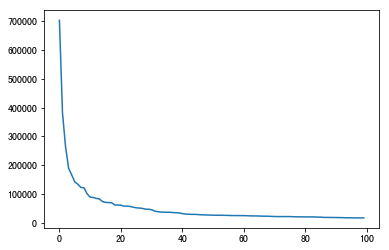

In [212]:
plt.plot(x, frequencies)

# 只要你的数据量足够大, 那么，出现次数第N多的单词，是出现次数最多的单词的频率的 1/N

## 语言模型

$language-model = Pr(sentence)$ 

## 1-gram

In [213]:
most_common_500 = [w for w, f in word_counts.most_common(500)]

In [228]:
most_common_to_10000_100500 = [w for w, f in word_counts.most_common(50000)][500:]

In [233]:
''.join(random.sample(most_common_500, k=10))

'第现在主场你好随着当日这种介绍正在'

In [231]:
''.join(random.sample(most_common_500_to_1000, k=10))

'候选人确保青年创业朝鲜土耳其对接分钟起来纽约'

## 1-gram

## 我衡量一个句子的概率，我就简单说，这个句子的概率，就等于每个单词的概率，乘起来！

$ Pr(sententence) = Pr(w_1 w_2.. w_n)$

$ Pr(w1 w2 .. wn) = Pr(w1 | w_2 w_3 .. w_n)Pr(w_2 w_3 .. w_n)$
$ Pr(w1 w2 .. wn) = Pr(w1 | w_2 w_3 .. w_n)Pr(w_2 | w_3 .. w_n) Pr( w_3 .. w_n)$
$ Pr(w1 w2 .. wn) = Pr(w1 | w_2 w_3 .. w_n)Pr(w_2 | w_3 .. w_n).. Pr( w_{n-1} | w_n)Pr(w_n)$

Pr(AB) = Pr(A|B)Pr(B)

#### Pr(A|B) = Pr(A) => A 和 B 两者无关

#### Pr(你明天上班迟到 | 南非总统今天喝牛奶) != Pr(你明天上班迟到)

#### Pr(你明天上班迟到 | 南非总统今天喝牛奶) == Pr(你明天上班迟到)

$ Pr(w1 w2 .. wn) = Pr(w1 | w_2 w_3 .. w_n)Pr(w_2 | w_3 .. w_n).. Pr( w_{n-1} | w_n)Pr(w_n)$

$ one-gram = Pr(w1 w2 .. wn) = Pr(w1)Pr(w_2).. Pr( w_{n-1})Pr(w_n)$

In [265]:
min_frequences= min([f for w, f in word_counts.most_common()])

def prob_1(word):
    # out of vocabulary 
    if word in word_counts: 
        return word_counts[word] / len(ALL_TOKENS)
    else:
        return min_frequences / len(ALL_TOKENS)

In [266]:
prob_1('中国')

0.004040071167097489

In [244]:
prob_1('美国')

0.0014465111014973448

In [245]:
from functools import reduce

In [250]:
from operator import mul

In [251]:
reduce(mul, [1, 2, 3, 4, 5, 6, 8])

5760

In [252]:
def _1_gram(sentence):
    words = cut(sentence)
    
    return reduce(mul, [prob_1(w) for w in words])

In [263]:
_1_gram('我今天回家')

7.7820177302833e-12

In [264]:
_1_gram('我今天西瓜')

1.7146818727742862e-12

$ Pr(w1 w2 .. wn) = Pr(w1 | w_2 w_3 .. w_n)Pr(w_2 | w_3 .. w_n).. Pr( w_{n-1} | w_n)Pr(w_n)$

In [ ]:
Pr(你 | 今天) = count(你今天) / count(今天)

$ two-gram = Pr(w1*w2 .. wn) = Pr(w1 | w_2)Pr(w_2 | w_3).. Pr( w_{n-1} | w_n)Pr(w_n)$
$ two-gram = Pr(w1*w2 .. wn) = \prod_i^n \frac{count(w_iw_{i+1})}{count(w_{i+1})} Pr(w_n)$

In [269]:
TOKEN_2_GRAM = [''.join(ALL_TOKENS[i:i+2]) for i in range(len(ALL_TOKENS[:-2]))]

In [273]:
len(ALL_TOKENS)

17618254

In [274]:
len(TOKEN_2_GRAM)

17618252

In [271]:
TOKEN_2_GRAM[10:]

['6等',
 '等15',
 '15款',
 '款机型',
 '机型外',
 '外其余',
 '其余机型',
 '机型已',
 '已暂停',
 '暂停更新',
 '更新发布',
 '发布含',
 '含开发',
 '开发版',
 '版体验版',
 '体验版内测',
 '内测稳定版',
 '稳定版暂不受',
 '暂不受影响',
 '影响以',
 '以确保',
 '确保工程师',
 '工程师可以',
 '可以集中',
 '集中全部',
 '全部精力',
 '精力进行',
 '进行系统优化',
 '系统优化工作',
 '工作有人',
 '有人猜测',
 '猜测这',
 '这也',
 '也是',
 '是将',
 '将精力',
 '精力主要',
 '主要用到',
 '用到MIUI9',
 'MIUI9的',
 '的研发',
 '研发之中',
 '之中MIUI8',
 'MIUI8去年',
 '去年5',
 '5月',
 '月发布',
 '发布距今已有',
 '距今已有一年',
 '一年有余',
 '有余也',
 '也是',
 '是时候',
 '时候更新换代',
 '更新换代了',
 '了当然',
 '当然关于',
 '关于MIUI9',
 'MIUI9的',
 '的确切',
 '确切信息',
 '信息我们',
 '我们还是',
 '还是等待',
 '等待官方消息',
 '官方消息\n',
 '\n骁龙',
 '骁龙835',
 '835作为',
 '作为唯一',
 '唯一通过',
 '通过Windows10',
 'Windows10桌面',
 '桌面平台',
 '平台认证',
 '认证的',
 '的ARM',
 'ARM处理器',
 '处理器高通',
 '高通强调',
 '强调不会',
 '不会因为',
 '因为只',
 '只考虑',
 '考虑性能',
 '性能而',
 '而去',
 '去屏蔽掉',
 '屏蔽掉小',
 '小核心',
 '核心相反',
 '相反他们',
 '他们正',
 '正联手',
 '联手微软',
 '微软找到',
 '找到一种',
 '一种适合',
 '适合桌面',
 '桌面平台',
 '平台的',
 '的兼顾',
 '兼顾性能',
 '性能和',
 '和功耗',
 '功耗的',
 '的完美',
 '完美方案',
 '方案报道',
 '报道称',
 '

In [272]:
len(TOKEN_2_GRAM)

17618252

In [275]:
word_count_2 = Counter(TOKEN_2_GRAM)

$ two-gram = Pr(w1*w2 .. wn) = \prod_i^n \frac{count(w_iw_{i+1})}{count(w_{i+1})} Pr(w_n)$

In [288]:
def prob_2(word1, word2):
    combine = word1 + word2
    if combine in word_count_2:
        return word_count_2[combine] / word_counts[word2]
    else: # out of vocabulary 
        return 1 / len(word_counts)
        
def _2_gram(sentence):
    words = cut(sentence)
    
    prob = 1
    
    for i in range(len(words)-1):
        word, next_word = words[i], words[i+1]
        
        prob *= prob_2(word, next_word)
        
    prob *= prob_1(words[-1])
    
    return prob

In [289]:
_2_gram('中国发射了一枚火箭')

9.965693602135584e-14

In [290]:
_2_gram('中国发射了一枚窗帘')

1.4567970386810924e-18

In [296]:
need_compared = [
    ('今天晚上请你吃大餐，我们一起吃日料', '今天晚上请你吃大餐，我们一起吃苹果'),
    ('真是一只好看的小猫', '真事一只好看的小猫'),
    ('今晚我去吃火锅', '今晚火锅去吃我'),
    ('洋葱奶昔来一杯', '养乐多绿来一杯')
]

In [297]:
for s1, s2 in need_compared:
    print('Pr({}) = {}'.format(s1, _2_gram(s1)))
    print('Pr({}) = {}'.format(s2, _2_gram(s2)))

Pr(今天晚上请你吃大餐，我们一起吃日料) = 1.5903389425741782e-45
Pr(今天晚上请你吃大餐，我们一起吃苹果) = 8.703384317468003e-40
Pr(真是一只好看的小猫) = 8.273018279582945e-22
Pr(真事一只好看的小猫) = 3.0233993266831647e-27
Pr(今晚我去吃火锅) = 1.7325227255339101e-18
Pr(今晚火锅去吃我) = 1.4852604423993444e-20
Pr(洋葱奶昔来一杯) = 7.580540796399728e-19
Pr(养乐多绿来一杯) = 7.125708348615745e-17


## 1. 数据思维 Data Driven 
## 2. 数学模型 -> 编程实现 

# More Data, Better Result